<a href="https://colab.research.google.com/github/dnevo/ImageProcessing/blob/main/ImageProcessingRecitation_02_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Image Files

**Digital image:** a matrix of pixel.

**Pixel:** is the smallest addressable element in a digital image. Pixel range is: $[0..255]$. $255$ is white, $0$ is black, and grayscale in between.

It may be useful to normalize to the range of $[0..1]$ by 255 division.

Image processing basic function by matrix add / substract / multiply / division.

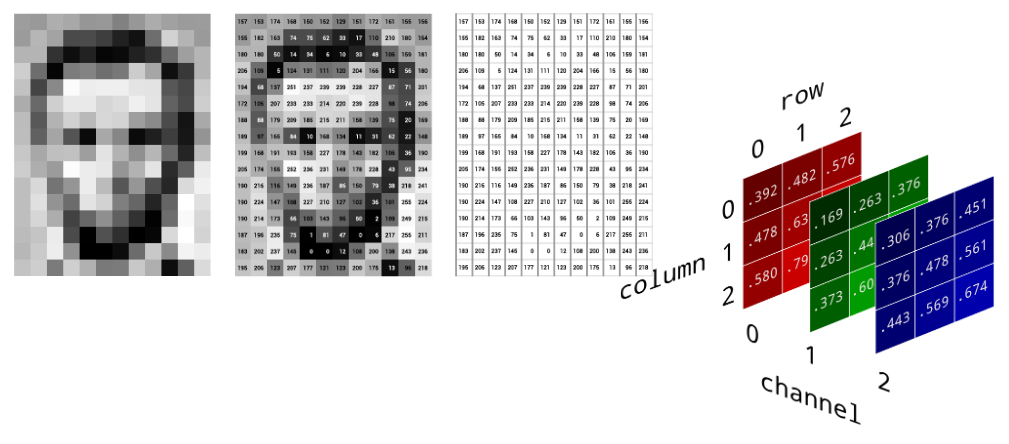

## 2.1 Access a file

### 2.1.1 Access a file in Google Drive

In [ ]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [ ]:
GOOGLE_DRIVE_PATH = "drive/My Drive/ImageProcessing"
fname = 'balls1.tiff'
fp = os.path.join(GOOGLE_DRIVE_PATH, fname)

### 2.1.2 Access a file in GitHub

In [ ]:
GITHUB_PATH = 'https://raw.githubusercontent.com/dnevo/ImageProcessing/main/images/'

In [ ]:
def read_file(fname:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image 
    in a numpy array.

    Args:
        fname: the file name
        file_path: the file path.. Default value is Doron's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, fname)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

## 2.2 Read image into Numpy array

In [ ]:
img = read_file(fname='house.tiff')

In [ ]:
print(img.shape)     # Grayscale shape size is 2

(293, 450)


In [ ]:
print(img)  # type should be [0, 255](int) or [0.0, 1.0](float)

[[110 110 110 ... 146 146 146]
 [110 110 110 ... 144 148 148]
 [111 111 111 ... 155 158 158]
 ...
 [ 87  87  86 ... 124 101  87]
 [ 80  79  79 ... 120 100  90]
 [ 80  79  79 ... 120 122 112]]


In [ ]:
print(img.max(),img.min(),int(img.mean()))

254 0 137


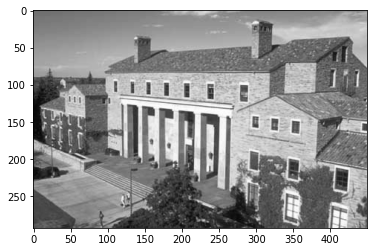

In [ ]:
plt.imshow(img,  cmap='gray', vmin=0, vmax=255);

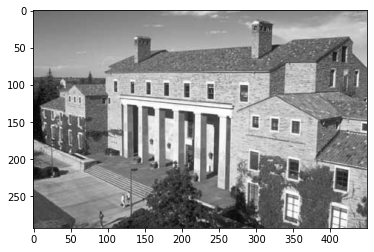

In [ ]:
img_n = img / 255
plt.imshow(img_n,  cmap='gray');

## 2.3 Image manipulation

Image brightening

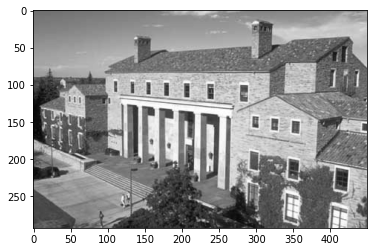

In [ ]:
img_bright = img + 50
plt.imshow(img_bright, cmap='gray');

**watch out from overflow / underflow**

In [ ]:
print(img_bright.max(),img_bright.min(),int(img_bright.mean()))

304 50 187


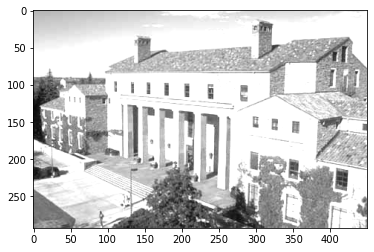

In [ ]:
img_bright = (img + 100).clip(max=255)
plt.imshow(img_bright, cmap='gray');

Image darkening

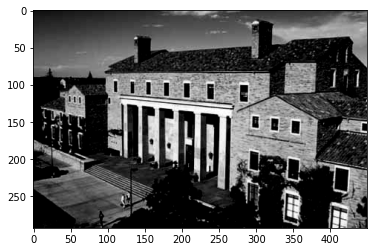

In [ ]:
img_dark = (img - 100).clip(min=0)
plt.imshow(img_dark, cmap='gray');

**Slicing**

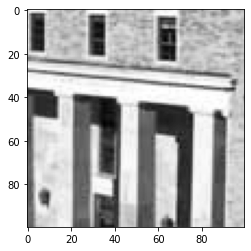

In [ ]:
nrows, ncols =img.shape
rows_center = nrows // 2
cols_center = ncols // 2
img_center = img[rows_center-50:rows_center+50, cols_center-50:cols_center+50].copy()
plt.imshow(img_center, cmap='gray');

## 2.4 Color Images

Color image - it has 3 channels: R, G, B

(400, 810, 3)


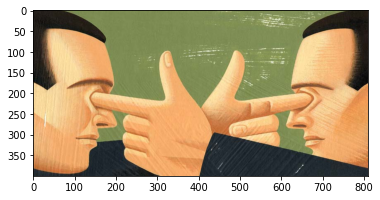

In [ ]:
img_color = read_file(fname='faces-rgb.tiff')
plt.imshow(img_color);
print(img_color.shape)  # RGB shape size is 3

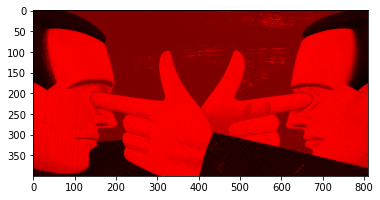

In [ ]:
img_r = img_color.copy()
img_r[:, :, 1] = 0
img_r[:, :, 2] = 0
plt.imshow(img_r);  # Red channel

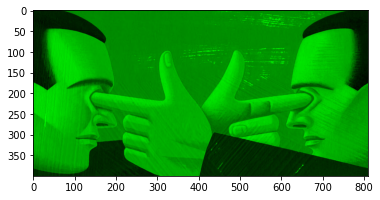

In [ ]:
img_g = img_color.copy()
img_g[:, :, 0] = 0
img_g[:, :, 2] = 0
plt.imshow(img_g);    # Green channel